## Introduction

The 2020 [point-in-time count](https://www.kingcounty.gov/elected/executive/constantine/news/release/2020/July/01-homeless-count.aspx) of people experiencing homelessness for Seattle/King County was 11,751. This represents a 5% increase over the 2019 count and reflects similar trend across many counties in the western U.S.. A step towards addressing homelessness is improving our understanding of the relationship between local housing market factors and homelessness. 

The U.S. Department of Housing and Urban Development (HUD) produced a report in 2019 [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) that describes a model-based approach to understanding of the relationship between local housing market factors and homelessness. Our project is motivated by the goals of the HUD study:

"To continue progressing toward the goals of ending and preventing homelessness, we must further our knowledge of the basic community-level determinants of homelessness. The primary objectives of this study are to (1) identify market factors that have established effects on homelessness, (2) construct and evaluate empirical models of community-level homelessness.."

We will investigate whether there are alternative modeling approaches that outperform the models described in the HUD report.


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

## The data

The [data](https://github.com/brian-fischer/DATA-3320/blob/main/homelessness/05b_analysis_file_update.csv) for this project are described in HUD's report [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) in the section titled DATA.

I will refer you to this section of the HUD report for a detailed description of the sources of the data and how they were processed.

The data dictionary [HUD TO3 - 05b Analysis File - Data Dictionary.csv](https://github.com/brian-fischer/DATA-3320/blob/main/homelessness/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20-%20Dictionary.csv) contains descriptions of all variables in the data set.




## Load the data

In [2]:
# data
analysis_df = pd.read_csv('https://raw.githubusercontent.com/cmdenault/Homelessness/main/dataSets/05b_analysis_file_update.csv')

In [3]:
# dictionary to refer to 
dictionary = pd.read_csv('https://raw.githubusercontent.com/cmdenault/Homelessness/main/dataSets/HUD_to3_dictionary.csv')


## Explore the contents of the data set

In [4]:
analysis_df.head(11)

,year,cocnumber,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,pit_ind_shelt_pit_hud,pit_ind_unshelt_pit_hud,pit_ind_hless_pit_hud,pit_perfam_shelt_pit_hud,pit_perfam_unshelt_pit_hud,...,sub_high_cost_rent75,sub_high_cost_homeval75,sub_high_rent_share75,tight_high_cost_rental_mkt,sub_tight_high_cost_rent,sub_west_coast_all_urb,sub_west_census,major_city,suburban,rural
0,2010,AK-500,1113.0,118.0,1231.0,633.0,107.0,740.0,480.0,11.0,...,1,1,1,3,1,1,1,1,0,0
1,2011,AK-500,1082.0,141.0,1223.0,677.0,117.0,794.0,405.0,24.0,...,1,1,0,3,1,1,1,1,0,0
2,2012,AK-500,1097.0,50.0,1147.0,756.0,35.0,791.0,341.0,15.0,...,1,1,1,3,1,1,1,1,0,0
3,2013,AK-500,1070.0,52.0,1122.0,792.0,52.0,844.0,278.0,0.0,...,1,1,0,3,1,1,1,1,0,0
4,2014,AK-500,970.0,53.0,1023.0,688.0,48.0,736.0,282.0,5.0,...,1,1,1,3,1,1,1,1,0,0
5,2015,AK-500,1029.0,179.0,1208.0,679.0,158.0,837.0,350.0,21.0,...,1,1,1,4,1,1,1,1,0,0
6,2016,AK-500,865.0,240.0,1105.0,665.0,240.0,905.0,200.0,0.0,...,1,1,1,3,1,1,1,1,0,0
7,2017,AK-500,973.0,155.0,1128.0,693.0,155.0,848.0,280.0,0.0,...,1,1,1,4,1,1,1,1,0,0
8,2010,AK-501,558.0,74.0,632.0,320.0,58.0,378.0,238.0,16.0,...,1,1,1,3,1,0,1,0,0,1
9,2011,AK-501,678.0,227.0,905.0,365.0,127.0,492.0,313.0,100.0,...,0,0,0,0,0,0,1,0,0,1


In [5]:
analysis_df.info(verbose='true')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 332 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    year                              int64  
 1    cocnumber                         object 
 2    pit_tot_shelt_pit_hud             float64
 3    pit_tot_unshelt_pit_hud           float64
 4    pit_tot_hless_pit_hud             float64
 5    pit_ind_shelt_pit_hud             float64
 6    pit_ind_unshelt_pit_hud           float64
 7    pit_ind_hless_pit_hud             float64
 8    pit_perfam_shelt_pit_hud          float64
 9    pit_perfam_unshelt_pit_hud        float64
 10   pit_perfam_hless_pit_hud          float64
 11   pit_ind_chronic_hless_pit_hud     float64
 12   pit_perfam_chronic_hless_pit_hud  float64
 13   pit_vet_hless_pit_hud             float64
 14   econ_urb_urbanicity               int64  
 15   coctag                            int64  
 16   panelvar              

This data frame has an extremely large amount of columns (302) and around 3000 entries

In [6]:
dictionary.head(10)

,Associated Domain,Variable,Variable Label,Derived,Source or Root Variable,Table Name(s)
0,Identifier,year,year,No,NaN,NaN
1,Identifier,cocnumber,continuum of care number,No,HUD,NaN
2,Outcome,pit_tot_shelt_pit_hud,total sheltered - HUD PIT,No,HUD PIT,NaN
3,Outcome,pit_tot_unshelt_pit_hud,total unsheltered - HUD PIT,No,HUD PIT,NaN
4,Outcome,pit_tot_hless_pit_hud,total homeless - HUD PIT,No,HUD PIT,NaN
5,Secondary Outcome,pit_ind_shelt_pit_hud,individuals sheltered - HUD PIT,No,HUD PIT,NaN
6,Secondary Outcome,pit_ind_unshelt_pit_hud,individuals unsheltered - HUD PIT,No,HUD PIT,NaN
7,Secondary Outcome,pit_ind_hless_pit_hud,total individuals - HUD PIT,No,HUD PIT,NaN
8,Secondary Outcome,pit_perfam_shelt_pit_hud,persons in families sheltered - HUD PIT,No,HUD PIT,NaN
9,Secondary Outcome,pit_perfam_unshelt_pit_hud,persons in Families unsheltered - HUD PIT,No,HUD PIT,NaN


In [7]:
dictionary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Associated Domain        332 non-null    object
 1   Variable                 332 non-null    object
 2   Variable Label           332 non-null    object
 3   Derived                  332 non-null    object
 4   Source or Root Variable  307 non-null    object
 5   Table Name(s)            105 non-null    object
dtypes: object(6)
memory usage: 15.7+ KB


### Explore the data sources

Use the dictionary to find the unique `Associated Domain` values.

In [8]:
dictionary['Associated Domain'].unique()

array(['Identifier', 'Outcome', 'Secondary Outcome', 'Subgroup',
       'Safety Net', 'Demographic', 'Housing', 'Economic', 'Local Policy',
       'Climate', 'Geography'], dtype=object)

Graph the number of data souces in the top 10 highest associated domains.

Text(0.5, 0, '')

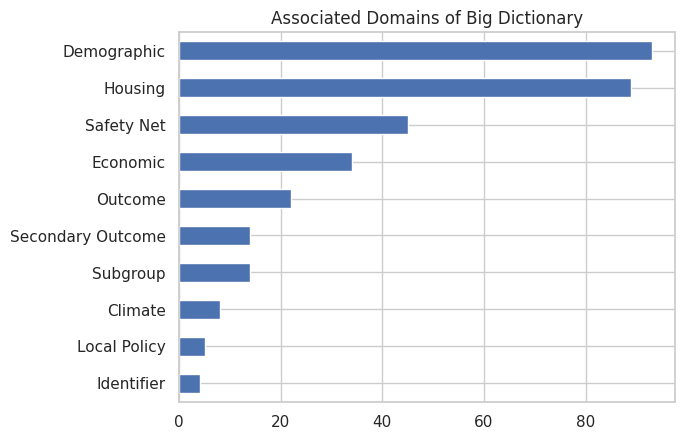

In [9]:
dictionary['Associated Domain'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()

plt.title('Associated Domains of Big Dictionary')
plt.xlabel('')

Looks like we have mostly demographic and housing variables.


Make a bar graph of the counts of different data sources described in `Source or Root Variable`. The graph has the following features:

1. Bars ordered in descending order based on the count.
2. Only included the 10 most common data sources.
3. Oriented the plot so that it is easy to read the labels.


In [10]:
# data frame holds source or root varaible and the number of values in each
test = pd.DataFrame(dictionary['Source or Root Variable'].value_counts())

In [11]:
# only get the 10 largest 
test = test.nlargest(10, 'Source or Root Variable')

In [13]:
# reset the index so the source or root variable is not the index
test = test.reset_index()

In [14]:
test

,index,Source or Root Variable
0,Census ACS 5-Year Estimates,30
1,Census Intercensal Population Estimates,28
2,HUD PIT,16
3,HUD,8
4,HUD HIC,8
5,Eviction Lab at Princeton University,6
6,See hou_mkt_medrent_acs5yr,6
7,See hou_mkt_homeval_acs5yr,6
8,See hou_mkt_rentvacancy_acs5yr,5
9,See dem_soc_singparent_acs5yr,5


Text(0.5, 1.0, 'Top 10 different data sources described in Source or Root Variable')

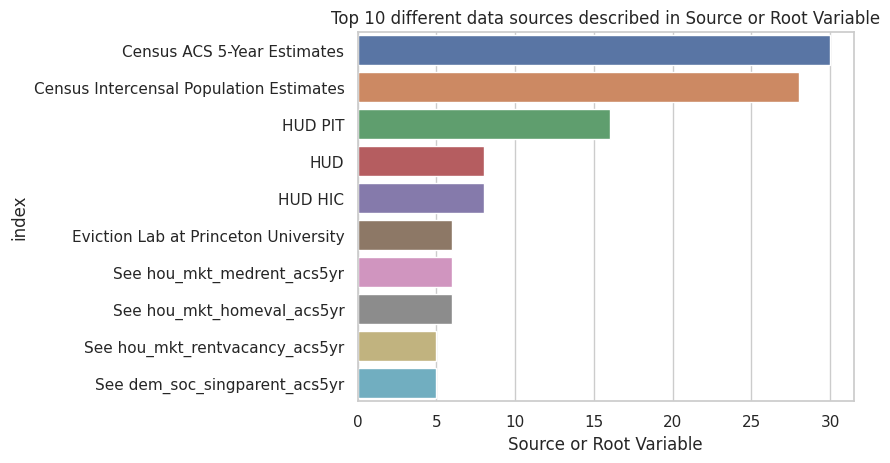

In [27]:
# graph
sns.barplot(data=test, x='Source or Root Variable', y='index')

# title
plt.title('Top 10 different data sources described in Source or Root Variable')


## Select relevant subsets of the data

We will explore a subset of the full data set. We will keep the following columns.

In [16]:
columns_to_keep = ["year", "cocnumber",
  
                  "pit_tot_hless_pit_hud", "pit_tot_shelt_pit_hud", "pit_tot_unshelt_pit_hud","dem_pop_pop_census",
  
                  "fhfa_hpi_2009", "ln_hou_mkt_medrent_xt", "hou_mkt_utility_xt", "hou_mkt_burden_own_acs5yr_2017", "hou_mkt_burden_sev_rent_acs_2017", "hou_mkt_rentshare_acs5yr_2017", "hou_mkt_rentvacancy_xt", "hou_mkt_density_dummy", "hou_mkt_evict_count", "hou_mkt_ovrcrowd_acs5yr_2017", "major_city", "suburban",
           
                  "econ_labor_unemp_rate_BLS", "econ_labor_incineq_acs5yr_2017", "econ_labor_pov_pop_census_share",
           
                  "hou_pol_hudunit_psh_hud_share", "hou_pol_occhudunit_psh_hud", "hou_mkt_homeage1940_xt",
           
                  "dem_soc_black_census", "dem_soc_hispanic_census", "dem_soc_asian_census", "dem_soc_pacific_census", "dem_pop_child_census", "dem_pop_senior_census", "dem_pop_female_census", "dem_pop_mig_census", "d_dem_pop_mig_census_share", "dem_soc_singadult_xt", "dem_soc_singparent_xt", "dem_soc_vet_xt", "dem_soc_ed_lessbach_xt", "dem_health_cost_dart", "dem_health_excesdrink_chr",
           
                  "env_wea_avgtemp_noaa", "env_wea_avgtemp_summer_noaa", "env_wea_precip_noaa", "env_wea_precip_annual_noaa"]
    

df will hold the orgininal data with only the columns we want

In [17]:
df = analysis_df[columns_to_keep]

How many variables of each Associated Domain are in the smaller data set?

What are the data sources in the smaller data set?


Make a smaller dictionary that matches our df data frame

In [18]:
dictionary_small = dictionary[dictionary['Variable'].isin(columns_to_keep)]

Text(0.5, 0, '')

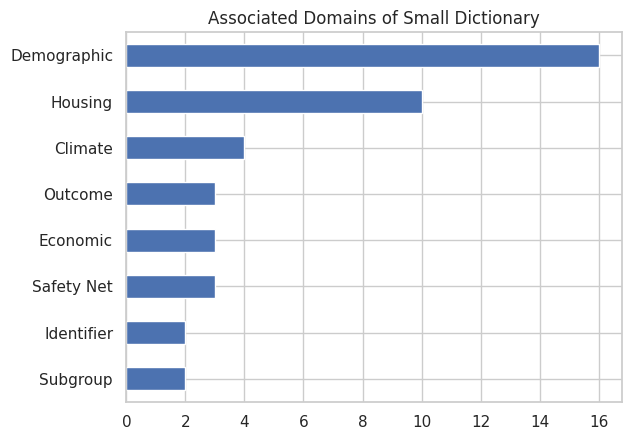

In [19]:
dictionary_small['Associated Domain'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()

plt.title('Associated Domains of Small Dictionary')
plt.xlabel('')

Looks like we now have a larder proportion of demographic variables, and less housing.

Text(0.5, 0, ' ')

) missing from current font.
  func(*args, **kwargs)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


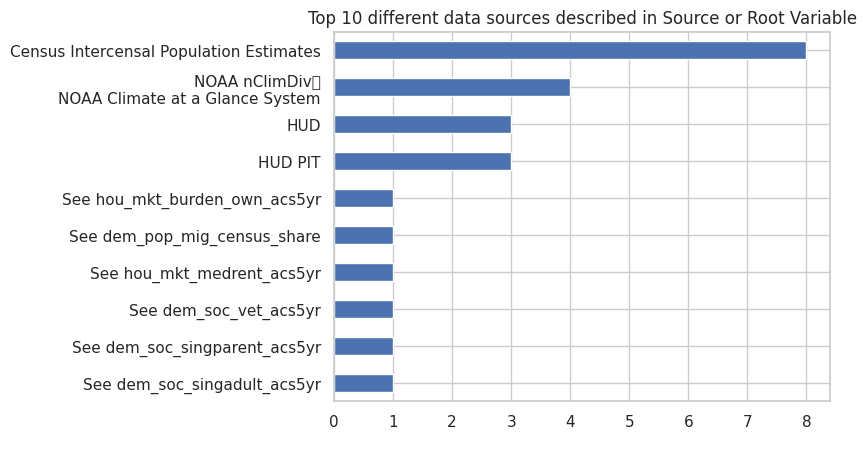

In [30]:
dictionary_small ['Source or Root Variable'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()

plt.title('Top 10 different data sources described in Source or Root Variable')
plt.xlabel(' ')

## Rename columns

In [39]:
df = df.rename(columns = {"cocnumber":"coc_number",
  
                          "pit_tot_hless_pit_hud":"total_homeless", 
                          "pit_tot_shelt_pit_hud":"total_sheltered", 
                          "pit_tot_unshelt_pit_hud":"total_unsheltered",
                          "dem_pop_pop_census":"total_population",
  
                          "fhfa_hpi_2009":"house_price_index_2009", 
                          "ln_hou_mkt_medrent_xt":"log_median_rent", 
                          "hou_mkt_utility_xt":"utility_costs", 
                          "hou_mkt_burden_own_acs5yr_2017":"percentage_owners_cost_burden_2016", 
                          "hou_mkt_burden_sev_rent_acs_2017":"percentage_renters_severe_cost_burden_2016", 
                          "hou_mkt_rentshare_acs5yr_2017":"share_renters_2016", 
                          "hou_mkt_rentvacancy_xt":"rental_vacancy_rate", 
                          "hou_mkt_density_dummy":"high_housing_density", 
                          "hou_mkt_evict_count":"number_eviction", 
                          "hou_mkt_ovrcrowd_acs5yr_2017":"share_overcrowded_units_2016", 
                          "major_city":"city_or_urban", 
           
                          "econ_labor_unemp_rate_BLS":"rate_unemployment", 
                          "econ_labor_incineq_acs5yr_2017":"gini_coefficient_2016", 
                          "econ_labor_pov_pop_census_share":"poverty_rate",
           
                          "hou_pol_hudunit_psh_hud_share":"share_HUD_units", 
                          "hou_pol_occhudunit_psh_hud":"HUD_unit_occupancy_rate", 
                          "hou_mkt_homeage1940_xt":"share_built_before_1940",
           
                          "dem_soc_black_census":"total_black", 
                          "dem_soc_hispanic_census":"total_latino_hispanic", 
                          "dem_soc_asian_census":"total_asian", 
                          "dem_soc_pacific_census":"total_pacific_islander", 
                          "dem_pop_child_census":"total_population_0_19", 
                          "dem_pop_senior_census":"total_population_65_plus", 
                          "dem_pop_female_census":"total_female_population", 
                          "dem_pop_mig_census":"net_migration", 
                          "d_dem_pop_mig_census_share":"migration_4_year_change", 
                          "dem_soc_singadult_xt":"proportion_one_person_households", 
                          "dem_soc_singparent_xt":"share_under_18_with_single_parent", 
                          "dem_soc_vet_xt":"share_veteran_status", 
                          "dem_soc_ed_lessbach_xt":"share_no_bachelors", 
                          "dem_health_cost_dart":"medicare_reimbursements_per_enrollee", 
                          "dem_health_excesdrink_chr":"percentage_excessive_drinking",
           
                          "env_wea_avgtemp_noaa":"average_Jan_temperature", 
                          "env_wea_avgtemp_summer_noaa":"average_summer_temperature", 
                          "env_wea_precip_noaa":"total_Jan_precipitation", 
                          "env_wea_precip_annual_noaa":"total_annual_precipitation"})

In [ ]:
dictionary_small.head()

,Associated Domain,Variable,Variable Label,Derived,Source or Root Variable,Table Name(s)
0,Identifier,year,year,No,NaN,NaN
1,Identifier,cocnumber,continuum of care number,No,HUD,NaN
2,Outcome,pit_tot_shelt_pit_hud,total sheltered - HUD PIT,No,HUD PIT,NaN
3,Outcome,pit_tot_unshelt_pit_hud,total unsheltered - HUD PIT,No,HUD PIT,NaN
4,Outcome,pit_tot_hless_pit_hud,total homeless - HUD PIT,No,HUD PIT,NaN


In [40]:
df.head()

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,proportion_one_person_households,share_under_18_with_single_parent,share_veteran_status,share_no_bachelors,medicare_reimbursements_per_enrollee,percentage_excessive_drinking,average_Jan_temperature,average_summer_temperature,total_Jan_precipitation,total_annual_precipitation
0,2010,AK-500,1231.0,1113.0,118.0,285194,0.000000,NaN,NaN,15.334315,...,NaN,NaN,NaN,NaN,7.78885,NaN,18.400000,56.599998,0.68,12.560000
1,2011,AK-500,1223.0,1082.0,141.0,293370,0.009359,2.266958,9.3,15.334315,...,24.832815,21.77351,17.23423,66.952057,7.85001,NaN,18.799999,55.799999,0.52,15.560000
2,2012,AK-500,1147.0,1097.0,50.0,296291,-0.049137,NaN,NaN,15.334315,...,NaN,NaN,NaN,NaN,7.90594,NaN,2.900000,55.900002,1.17,16.459999
3,2013,AK-500,1122.0,1070.0,52.0,298520,-0.255042,2.266958,9.3,15.334315,...,24.832815,21.77351,17.23423,66.952057,7.83198,NaN,23.299999,56.000000,1.10,20.270000
4,2014,AK-500,1023.0,970.0,53.0,301081,3.170481,NaN,NaN,15.334315,...,NaN,NaN,NaN,NaN,7.95718,NaN,30.299999,60.099998,1.52,24.010000


We now have 43 columns

## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

Make a pair plot of a couple variables and pit_tot_hless_pit_hud (the value we eventually want to predict), to see if there is any relationship initally

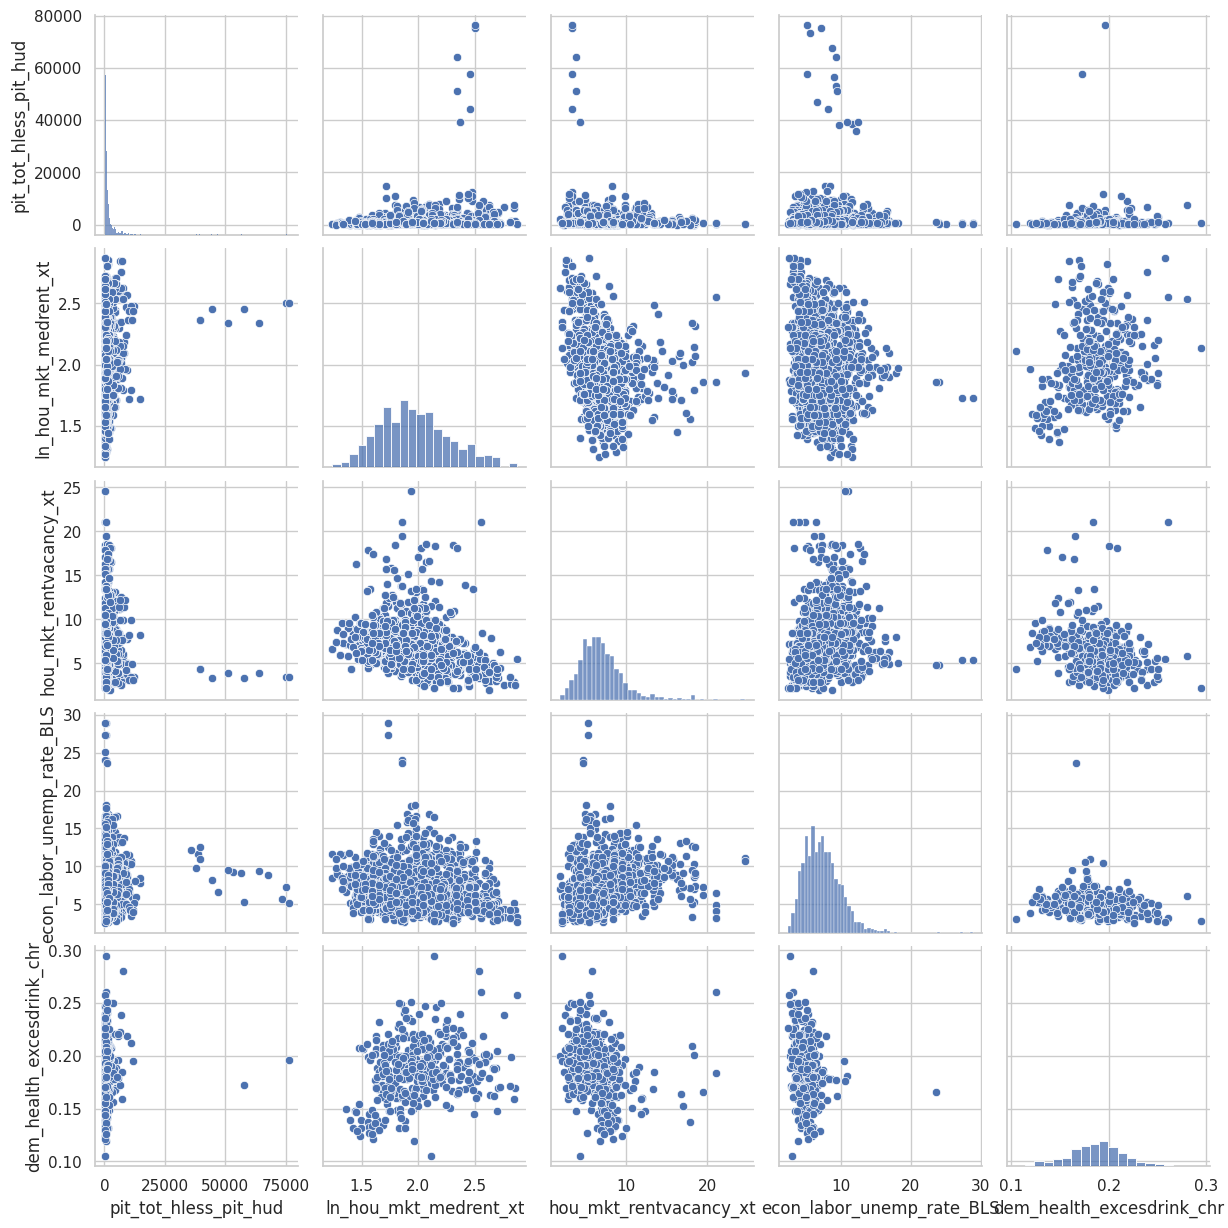

In [41]:
sns.pairplot(analysis_df[['pit_tot_hless_pit_hud', 'ln_hou_mkt_medrent_xt', 'hou_mkt_rentvacancy_xt', 'econ_labor_unemp_rate_BLS', 'dem_health_excesdrink_chr']])

We see a number of outliers, and no obvious relations. The outliers are likely cities with very high populations of homeless individuals like Los Angeles. 

how many CoC in the data set?

In [42]:
df['coc_number'].nunique()

376

In [43]:
df.columns.nunique()

43

We have a comparitively high amount of variables for the data entries we have.

## Quality Control

Check for out-of-range values or values that do not match what we want to analyze. Either set values to `NaN` or remove the observations, as appropriate.

In [44]:
df.agg(['min', 'max']).round(3)

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,proportion_one_person_households,share_under_18_with_single_parent,share_veteran_status,share_no_bachelors,medicare_reimbursements_per_enrollee,percentage_excessive_drinking,average_Jan_temperature,average_summer_temperature,total_Jan_precipitation,total_annual_precipitation
min,2010,AK-500,7.0,3.0,0.0,29344,-26.497,1.239,5.6,8.072,...,12.484,9.441,2.798,23.686,6.031,0.105,-3.24,55.80,0.000,1.25
max,2017,WY-500,76501.0,72565.0,42828.0,11058958,63.864,2.875,22.6,22.955,...,46.710,55.627,23.877,88.645,17.948,0.294,74.70,93.25,25.322,105.19


No values seem to be out of range or unreasonable.

## Identify and deal with missing values

Check for NaN values

In [45]:
df.isna().sum()

year                                             0
coc_number                                       0
total_homeless                                  14
total_sheltered                                 14
total_unsheltered                               14
total_population                                 0
house_price_index_2009                           0
log_median_rent                               1504
utility_costs                                 1504
percentage_owners_cost_burden_2016               0
percentage_renters_severe_cost_burden_2016       0
share_renters_2016                               0
rental_vacancy_rate                           1504
high_housing_density                             0
number_eviction                                  0
share_overcrowded_units_2016                     0
city_or_urban                                    0
suburban                                         0
rate_unemployment                                0
gini_coefficient_2016          

Determine whether there are missing values in the data set. Determine whether you have missing values after focusing on the relevant subset of the data.

<Axes: >

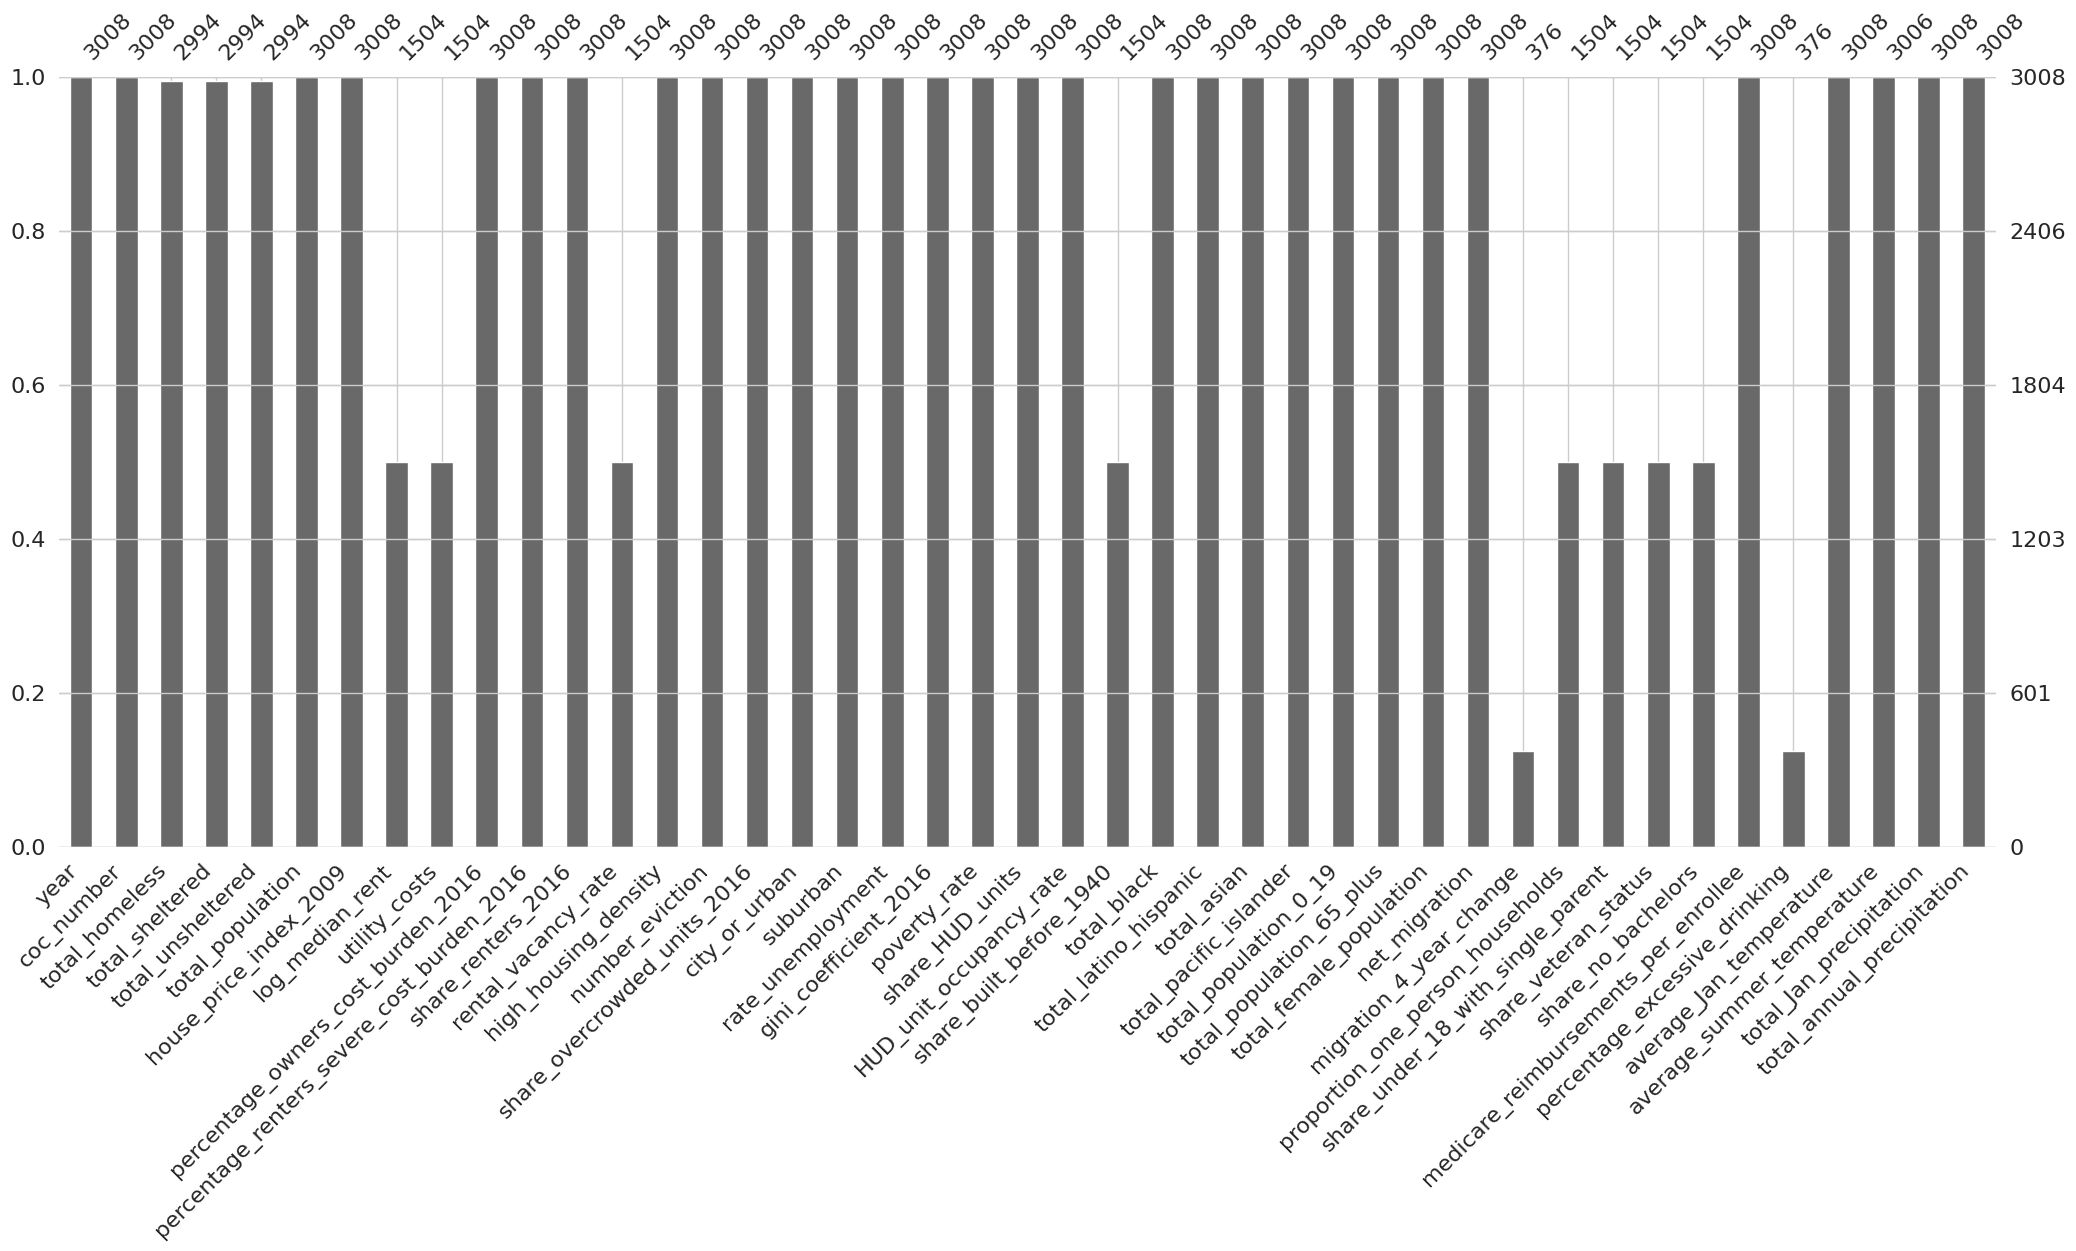

In [ ]:
msno.bar(df)

<Axes: >

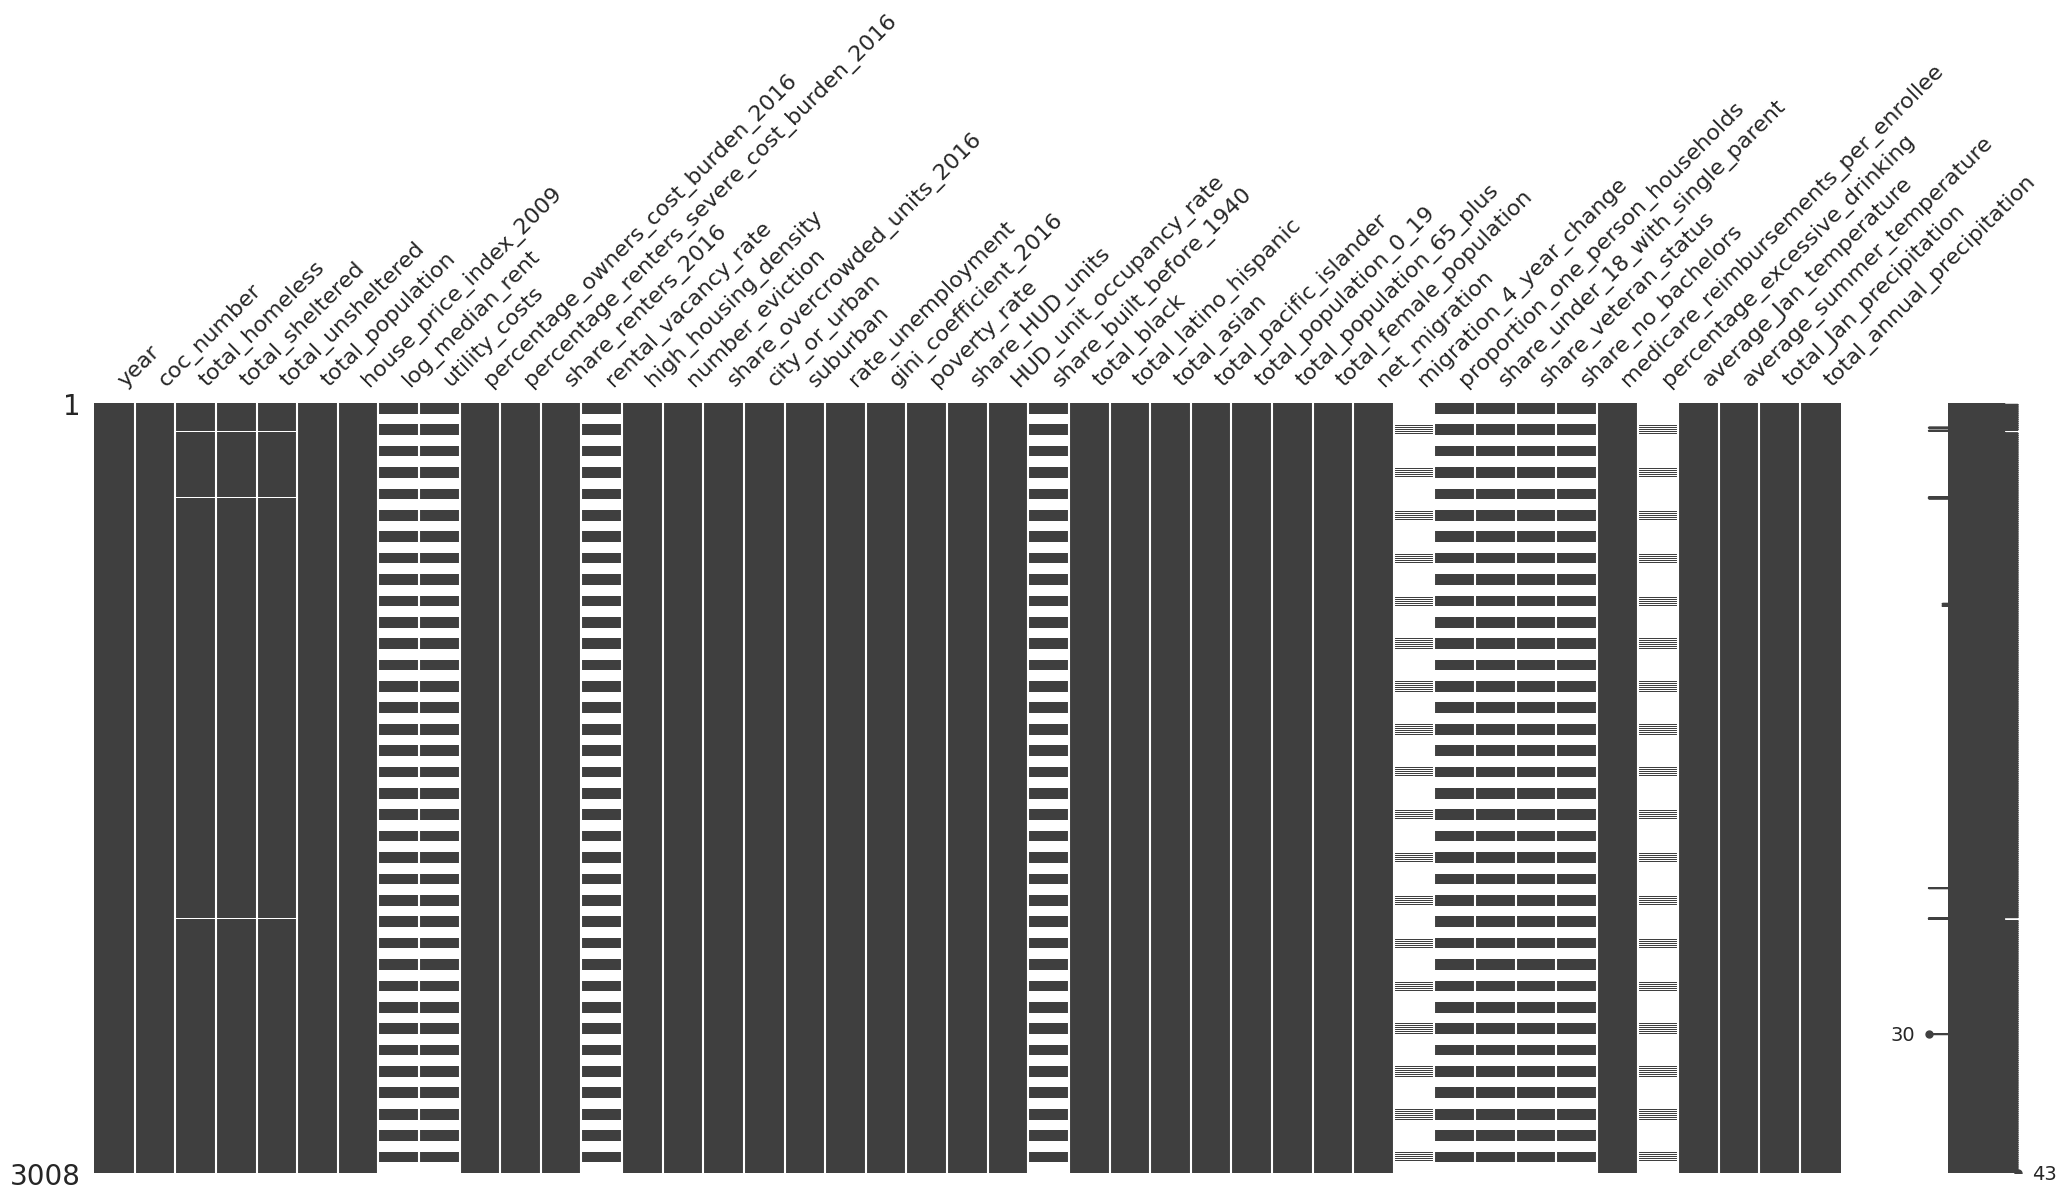

In [ ]:
msno.matrix(df)

Looks like some variables only get data collected every number of years. It also looks like we have some missing data on number of homeless population.

Produce scatter plots of the variables that are missing many values vs. time to see if data are missing from particular years.

<Axes: xlabel='total_homeless', ylabel='year'>

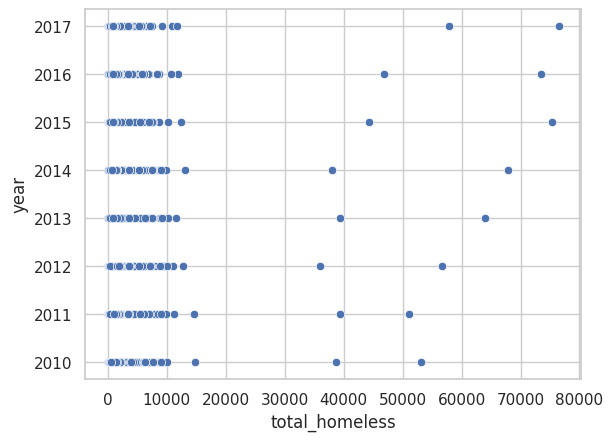

In [ ]:
# variable with every year
sns.scatterplot(data=df, x='total_homeless', y='year')

Variable with data taken only on odd years below.

<Axes: xlabel='log_median_rent', ylabel='year'>

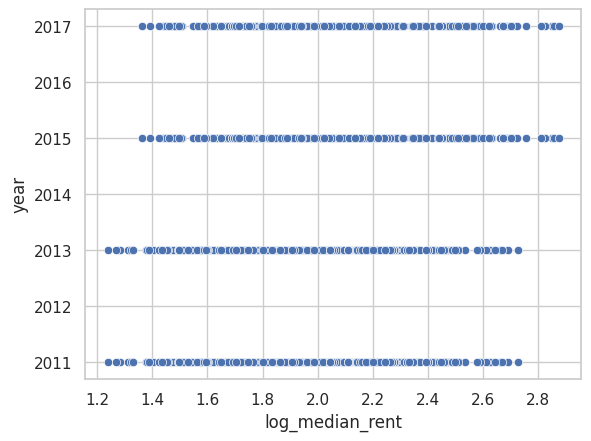

In [ ]:
# variable with seemingly missing years
sns.scatterplot(data=df, x='log_median_rent', y='year')

The variables migration_4_year_change and percentage_excessive_drinking data was only taken one year out of the data set.

In [ ]:
df[['year', 'migration_4_year_change']].head(10)

,year,migration_4_year_change
0,2010,NaN
1,2011,NaN
2,2012,NaN
3,2013,NaN
4,2014,NaN
5,2015,NaN
6,2016,NaN
7,2017,-0.849202
8,2010,NaN
9,2011,NaN


<ipython-input-41-6eb766376ec6>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(2000, 2020, 2)


(2000.0, 2020.0)

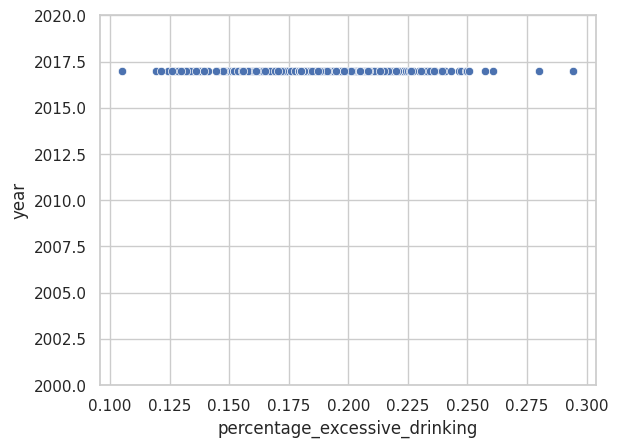

In [ ]:
# variable with seemingly missing years
sns.scatterplot(data=df, x='percentage_excessive_drinking', y='year')
plt.ylim(2000, 2020, 1)


This variable only gets recorded on one year in our data set, 2017

Delete rows missing homeless count data. Since this is the value we want to predict, we don't need rows without this value

In [47]:
# delete rows missing total homelessness dependent variable
df = df.loc[df['total_homeless'].isna() == False] 

In [46]:
# check to make sure no na for 
df.isna().sum()

year                                             0
coc_number                                       0
total_homeless                                  14
total_sheltered                                 14
total_unsheltered                               14
total_population                                 0
house_price_index_2009                           0
log_median_rent                               1504
utility_costs                                 1504
percentage_owners_cost_burden_2016               0
percentage_renters_severe_cost_burden_2016       0
share_renters_2016                               0
rental_vacancy_rate                           1504
high_housing_density                             0
number_eviction                                  0
share_overcrowded_units_2016                     0
city_or_urban                                    0
suburban                                         0
rate_unemployment                                0
gini_coefficient_2016          

Because some variables only have data for some years, we will only include years in our clean data set with all the values 


2017 is the only year with all of the data, so we will only include that year

In [ ]:
# try_me will hold the 2017 data
try_me = df.loc[df['percentage_excessive_drinking'].isna() == False]

In [ ]:
try_me.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 7 to 3007
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   year                                        374 non-null    int64  
 1   coc_number                                  374 non-null    object 
 2   total_homeless                              374 non-null    float64
 3   total_sheltered                             374 non-null    float64
 4   total_unsheltered                           374 non-null    float64
 5   total_population                            374 non-null    int64  
 6   house_price_index_2009                      374 non-null    float64
 7   log_median_rent                             374 non-null    float64
 8   utility_costs                               374 non-null    float64
 9   percentage_owners_cost_burden_2016          374 non-null    float64
 10  percentage_re

Make sure only 2017 data is in the the new frame

In [ ]:
try_me['year'].unique()

array([2017])

## Create relevant derived variables as new columns

We may already know that we want to process the data to create new variables from the existing variables. However, we often start analyzing the data and realize that it is useful to create new variables derived from the existing variables. Or, we might not create any new columns. It is fine to return to modify this step after exploring the data further.

Add rate of homelessness per 10,000 population, instead of just the total number

In [ ]:
try_me['hless_rate_per10k'] = (try_me['total_homeless'] / try_me['total_population']) * 10000

<ipython-input-72-3ea97a8f99cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_me['hless_rate_per10k'] = (try_me['total_homeless'] / try_me['total_population']) * 10000


Add rate of sheltered per 10,000 population

In [ ]:
try_me['sheltered_rate_per10k'] = (try_me['total_sheltered'] / try_me['total_population']) * 10000

<ipython-input-74-69141566c865>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_me['sheltered_rate_per10k'] = (try_me['total_sheltered'] / try_me['total_population']) * 10000


Add rate of unsheltered per 10,000 population

In [ ]:
try_me['unsheltered_rate_per10k'] = (try_me['total_unsheltered'] / try_me['total_population']) * 10000

<ipython-input-75-3ced076aff7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_me['unsheltered_rate_per10k'] = (try_me['total_unsheltered'] / try_me['total_population']) * 10000


Add demographic rates per 10,000 people

In [ ]:
try_me['percent_black'] = (try_me['total_black'] / try_me['total_population'])
try_me['percent_asian'] = (try_me['total_asian'] / try_me['total_population'])
try_me['percent_latino_hispanic'] = (try_me['total_latino_hispanic'] / try_me['total_population'])
try_me['percent_pacific_islander'] = (try_me['total_pacific_islander'] / try_me['total_population'])
try_me['percent_female'] = (try_me['total_female_population'] / try_me['total_population'])
try_me['percent_0_19'] = (try_me['total_population_0_19'] / try_me['total_population'])
try_me['percent_pop_65_plus'] = (try_me['total_population_65_plus'] / try_me['total_population'])

<ipython-input-93-be9b31e14cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_me['percent_black'] = (try_me['total_black'] / try_me['total_population'])
<ipython-input-93-be9b31e14cef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  try_me['percent_asian'] = (try_me['total_asian'] / try_me['total_population'])
<ipython-input-93-be9b31e14cef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [ ]:
try_me.head()

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,hless_rate_per10k,sheltered_rate_per10k,unsheltered_rate_per10k,percent_black,percent_asian,percent_latino_hispanic,percent_pacific_islander,percent_female,percent_0_19,percent_pop_65_plus
7,2017,AK-500,1128.0,973.0,155.0,297376,11.743647,2.438863,8.500000,15.334315,...,37.931777,32.719520,5.212257,0.053811,0.093952,0.089967,0.024387,0.489629,0.269161,0.099140
15,2017,AK-501,717.0,578.0,139.0,444146,9.042710,2.249699,14.607715,13.311670,...,16.143340,13.013739,3.129602,0.019530,0.040104,0.055727,0.004593,0.467752,0.278562,0.109905
23,2017,AL-500,1092.0,875.0,217.0,958302,-0.852477,1.862248,19.492331,12.188416,...,11.395155,9.130733,2.264422,0.331147,0.016632,0.040843,0.000311,0.521677,0.256410,0.149058
31,2017,AL-501,606.0,341.0,265.0,622361,-8.507004,1.858394,18.899839,12.539132,...,9.737114,5.479135,4.257979,0.266807,0.016889,0.033816,0.000382,0.519669,0.254735,0.167126
39,2017,AL-502,155.0,133.0,22.0,265264,0.751167,1.362010,18.803186,10.374694,...,5.843235,5.013873,0.829362,0.090348,0.004901,0.042056,0.000471,0.513937,0.236545,0.190708


In [ ]:
try_me.shape

(374, 53)

We have 374 entries across 46 variables. overfitting may be an issue due to our proportion of entries to predictors

Check for no missing values

In [ ]:
try_me.isna().sum()

year                                          0
coc_number                                    0
total_homeless                                0
total_sheltered                               0
total_unsheltered                             0
total_population                              0
house_price_index_2009                        0
log_median_rent                               0
utility_costs                                 0
percentage_owners_cost_burden_2016            0
percentage_renters_severe_cost_burden_2016    0
share_renters_2016                            0
rental_vacancy_rate                           0
high_housing_density                          0
number_eviction                               0
share_overcrowded_units_2016                  0
city_or_urban                                 0
suburban                                      0
rate_unemployment                             0
gini_coefficient_2016                         0
poverty_rate                            

## Export the clean .csv file

Export the clean data set

In [ ]:
from google.colab import files

In [ ]:
try_me.to_csv('homelessness_clean.csv', encoding = 'utf-8-sig', index=False) 

files.download('homelessness_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>